In [1]:
import pandas as pd
import numpy as np
from data_utils import create_date_df

# AR(1) 자기회귀 모델이 예측값을 생성하는 과정의 모사
n = 100 # 데이터 포인트 수
ar_params = [0.7] # 자기회귀 계수
residuals = np.random.normal(0, 1, n) # 잔차 생성

data = [0]
for i in range(1, n):
    data.append(ar_params[0] * data[i-1] + residuals[i])
    # (AR모델의 계수 x 자기의 이전 값) + 노이즈 잔차 

df = create_date_df(n, data)
# AR모델에 투입하기 위해 index를 date 값으로 지정
df = df.set_index('Date')

print(df.head(5))

               Value
Date                
2023-01-01  0.000000
2023-01-02  0.015960
2023-01-03  0.456860
2023-01-04 -0.625964
2023-01-05 -0.213925


In [3]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

# AR(1) 모델
model = AutoReg(df['Value'], lags=1)
results = model.fit()

# 모델 정보 출력
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -144.486
Method:               Conditional MLE   S.D. of innovations              1.041
Date:                Fri, 18 Aug 2023   AIC                            294.972
Time:                        14:03:33   BIC                            302.758
Sample:                    01-02-2023   HQIC                           298.122
                         - 04-10-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0253      0.105     -0.241      0.809      -0.231       0.180
Value.L1       0.6984      0.072      9.710      0.000       0.557       0.839
                                    Roots           

C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


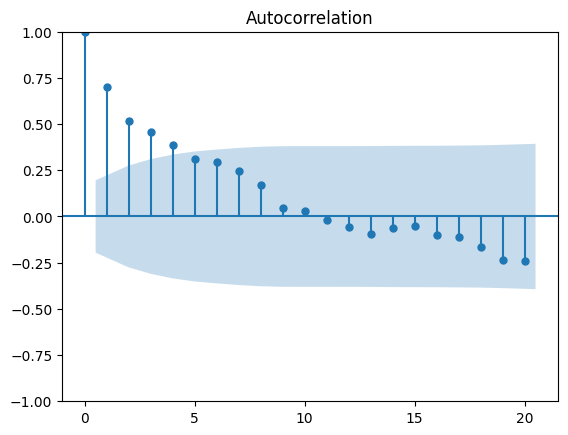

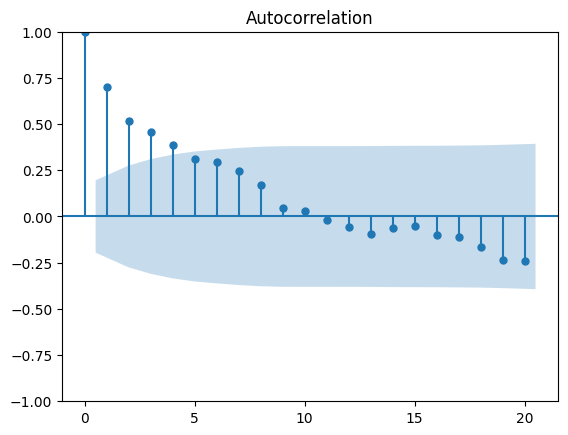

In [4]:
plot_acf(df['Value'], lags=20)